In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Odata2024File.csv', delimiter=';')

In [3]:
pd.set_option("display.max_columns", 75)

## Учасники, які пропустили обов'язковий предмет

Пропоную розглянути кількості учасників, які не прийшли на всі предмети, та які брали участь, хоча б в одному тесті - вони не відвідали інші з якихось причин

### Пропустили усі предмети

In [4]:
math_miss = df['MathBlockStatus']=='Не з’явився'
hist_miss = df['HistBlockStatus']=='Не з’явився'
ukr_miss = df['UkrBlockStatus']=='Не з’явився'

In [5]:
phys_miss = df['PhysBlockStatus']=='Не з’явився'
chem_miss = df['ChemBlockStatus']=='Не з’явився'
bio_miss = df['BioBlockStatus']=='Не з’явився'
geo_miss = df['GeoBlockStatus']=='Не з’явився'
eng_miss = df['EngBlockStatus']=='Не з’явився'
fra_miss = df['FraBlockStatus']=='Не з’явився'
deu_miss = df['DeuBlockStatus']=='Не з’явився'
spa_miss = df['SpaBlockStatus']=='Не з’явився'
lit_miss = df['UkrLitBlockStatus']=='Не з’явився'
add_miss = phys_miss | chem_miss | bio_miss | geo_miss | eng_miss | fra_miss | deu_miss | spa_miss | lit_miss

#### Пропустили усі предемети

In [6]:
all_miss = math_miss & hist_miss & ukr_miss & add_miss
sum(all_miss)

29096

### Відвідали і пропустили хоча б один

In [7]:
at_least_one_miss = math_miss | hist_miss | ukr_miss | add_miss
sum(~all_miss &at_least_one_miss)

179

### Розподіл за місцем тестування

In [8]:
some_miss_reg = (df[~all_miss &at_least_one_miss].groupby(['PTRegName']).count()['outid']).sort_values()
all_miss_reg = df[all_miss].groupby(['PTRegName']).count()['outid'].sort_values()

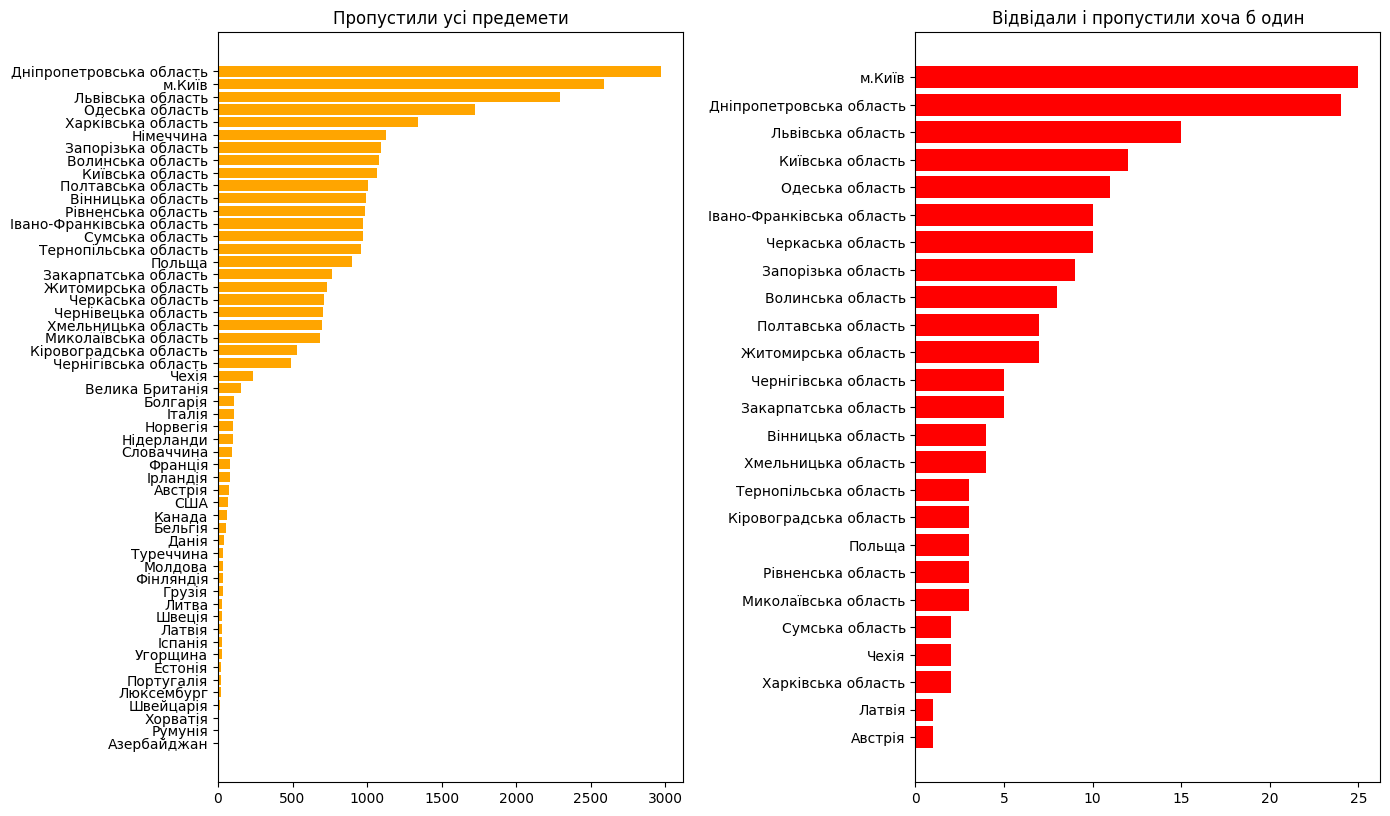

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.barh(all_miss_reg.index, all_miss_reg, color='orange')
ax1.set_title("Пропустили усі предемети")
ax2.barh(some_miss_reg.index, some_miss_reg, color='red')
ax2.set_title("Відвідали і пропустили хоча б один")
plt.subplots_adjust(top = 1.5, bottom=0, hspace=0, wspace=0.5)

#### Частки серед усіх учасників у цьому регіоні

In [10]:
some_miss_reg = (
    df[~all_miss &at_least_one_miss].groupby(['PTRegName']).count()['outid'] / df.groupby(['PTRegName']).count()['outid']
).sort_values() * 100
all_miss_reg = (
    df[all_miss].groupby(['PTRegName']).count()['outid'] / df.groupby(['PTRegName']).count()['outid']
).sort_values() *100

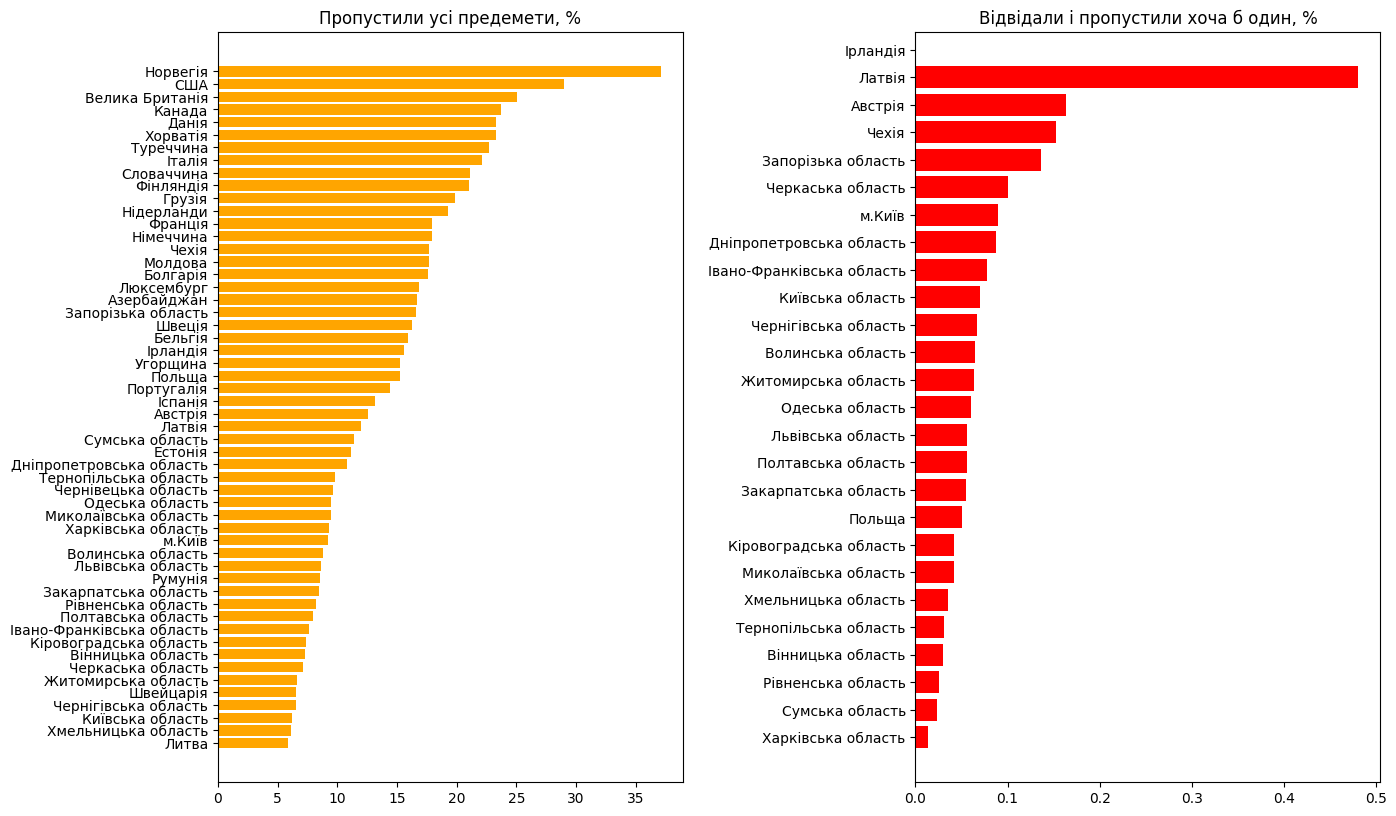

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.barh(all_miss_reg.index, all_miss_reg, color='orange')
ax1.set_title("Пропустили усі предемети, %")
ax2.barh(some_miss_reg.index, some_miss_reg, color='red')
ax2.set_title("Відвідали і пропустили хоча б один, %")
plt.subplots_adjust(top = 1.5, bottom=0, hspace=0, wspace=0.5)

#### Висновки

Таким чином, маючи аномалію щодо учасників НМТ, які пропустили усі предмети у інших країнах, ми можемо припустити гіпотезу, що учні не здають нмт через їх вступ до закордонних ВНЗ

### Розподіл за місцем навчання

In [12]:
some_miss_reg = (df[~all_miss &at_least_one_miss].groupby(['EORegName']).count()['outid']).sort_values()
all_miss_reg = df[all_miss].groupby(['EORegName']).count()['outid'].sort_values()

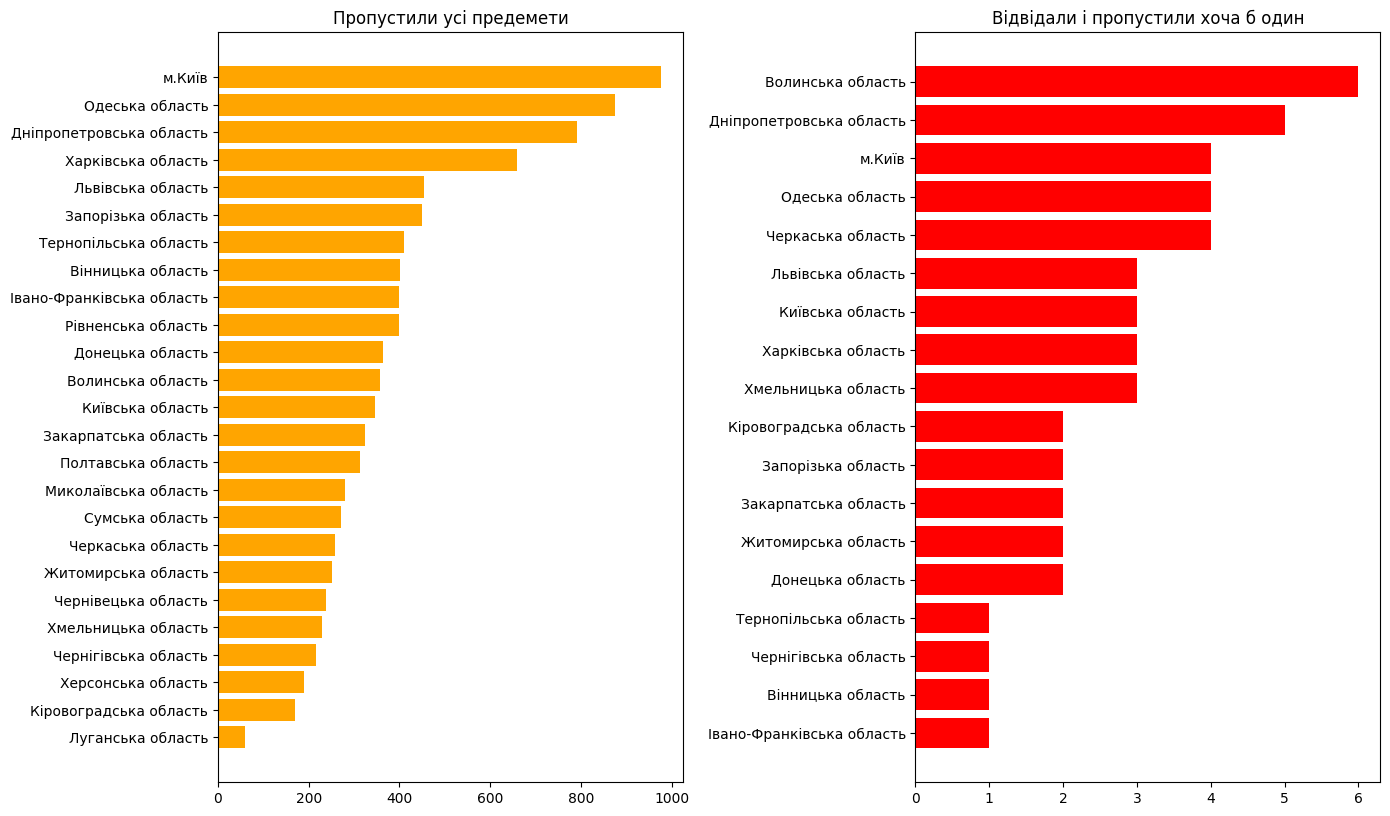

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.barh(all_miss_reg.index, all_miss_reg, color='orange')
ax1.set_title("Пропустили усі предемети")
ax2.barh(some_miss_reg.index, some_miss_reg, color='red')
ax2.set_title("Відвідали і пропустили хоча б один")
plt.subplots_adjust(top = 1.5, bottom=0, hspace=0, wspace=0.5)

#### Частки серед усіх учасників у цьому регіоні

In [14]:
some_miss_reg = (
    df[~all_miss &at_least_one_miss].groupby(['EORegName']).count()['outid'] / df.groupby(['EORegName']).count()['outid']
).sort_values() * 100
all_miss_reg = (
    df[all_miss].groupby(['EORegName']).count()['outid'] / df.groupby(['EORegName']).count()['outid']
).sort_values() *100

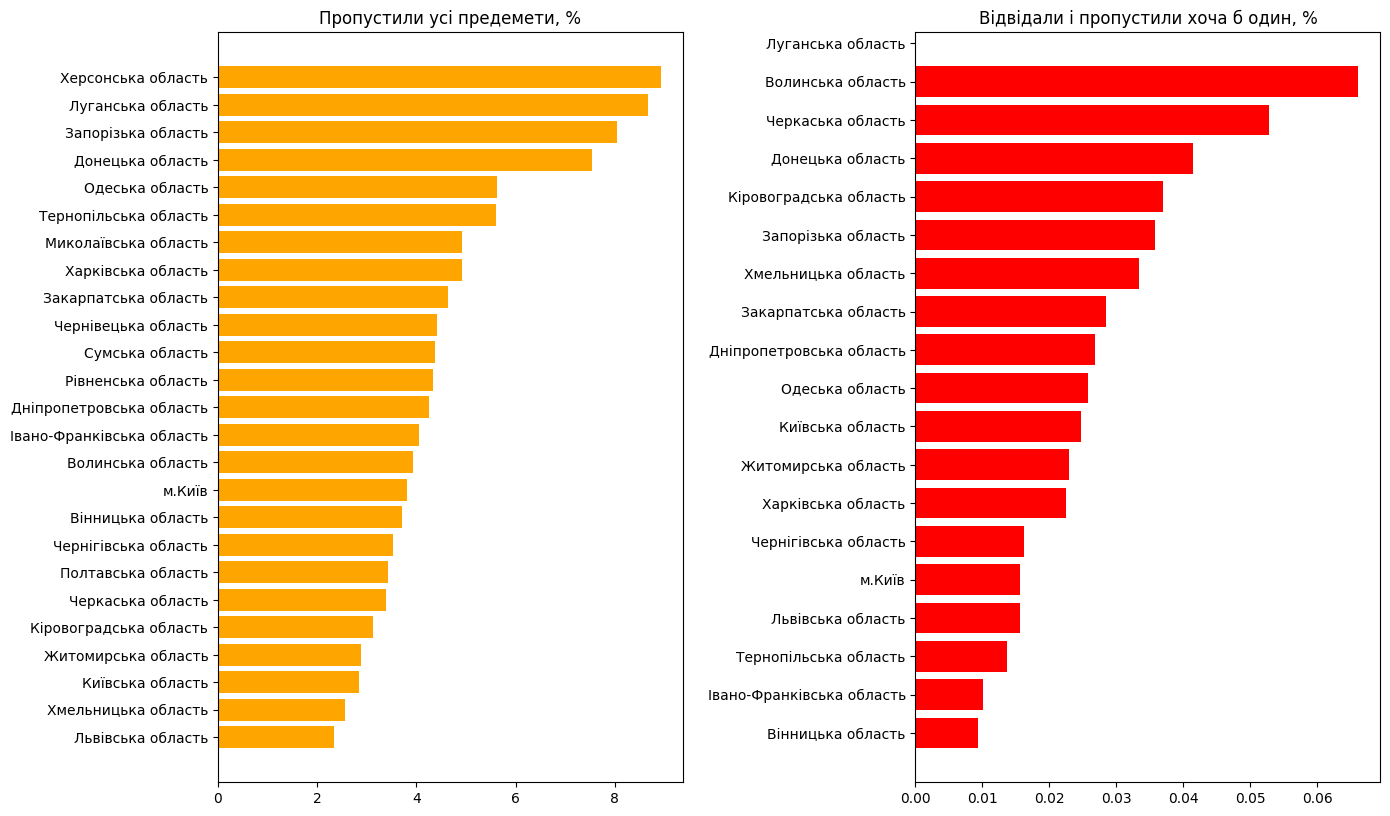

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.barh(all_miss_reg.index, all_miss_reg, color='orange')
ax1.set_title("Пропустили усі предемети, %")
ax2.barh(some_miss_reg.index, some_miss_reg, color='red')
ax2.set_title("Відвідали і пропустили хоча б один, %")
plt.subplots_adjust(top = 1.5, bottom=0, hspace=0, wspace=0.5)

#### Висновки

З данних випливає, що учасники з Луганської, Донецької, Запорізької, та Херсонької областей на понад 25% частіше повнісю пропускають участь в НМТ. Це може свідчити про фінансові, соціальні складнощі, та інші невідомі наразі проблеми, з якими вони стикаються, що вимушує їх пропустити участь в НМТ. Припускаю, що багато хто через бойові дії, та переселення не зміг підготуватися, та вирішив зовсім не брати участь. Або через відсутність планів на вищу освіту. Обидві гіпотези не втішають.